### Pivot Table

A better way of grasping how a pivot table works is by looking at a spreadsheet again or other tabular structured program. 

The pivot table takes a simple column wise data as input and groups the enteries intp 2-dimensional table that provides a multidimenisional summary of our data.

The difference between the pivot table and the group by is that the pivot table dispay its split, apply and combine methods in a 2 dimensional grid, unlike the group by which combines across a one-dimensional index


In [1]:
# we will work with database of titanic passengers
# this data is inbuilt stored data in seaborn

import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# summary for missing data look out

titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [68]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [38]:
titanic['sex'][titanic['alive']=='yes'].value_counts()

female    233
male      109
Name: sex, dtype: int64

In [44]:
titanic['sex'][titanic['alive']=='no'].value_counts()

male      468
female     81
Name: sex, dtype: int64

In [17]:
# let us work further with grouping
# we want to group our data by the gender of those who survived

titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


we could see immediately that majority of the boarders are male and at about 109 males surviced while about 468 of them died. while at the other hand, at about 314 of the females boarded the ship, while 233 of them survived, 81 of them died. This accounts for the 74% of the female surviving while about 18% of the male survived.

In [47]:
# let us dive deeper
# let us look at surviver by both sex and class

titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This gives us idea on how the survival is attributed to different class and gender. We could see that generally, those who had a first class had the highest rate of those that survived. 

Using this group by method to categoriz our data to presentable format looks a bit long and might be hard to grasp at first. That is why pivot_table is really essential at this  point.



In [63]:
# let us repeat of survival rate based on class with the help of pivot table

titanic.pivot_table('survived',index='sex', columns='class')

# values where used for survived because we want our data to be based on this column
# index was used for sex column
# class column was used for our columns

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [67]:
# multilevel pivot_table
# what of if we are interested in age as the 3rd dimension?, we would bin the age values
# binning would be done using pd.cut() function 

age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [71]:
# let us add more info
# pd.qcut produces quartiles

fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', index=['sex',age], columns=[fare,'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [76]:
# we can also use to aggfunc= to moderate and swmonatrate better our data

titanic.pivot_table(index='sex', columns='class', 
                   aggfunc={'survived':sum, 'fare':'mean', 'sex':'count'})

# the values keyword was ommitted here because the mapping aggfunc automatically does it


fare                         sex              survived         \
class        First     Second      Third First Second Third    First Second   
sex                                                                           
female  106.125798  21.970121  16.118810    94     76   144       91     70   
male     67.226127  19.741782  12.661633   122    108   347       45     17   

              
class  Third  
sex           
female    72  
male      47

In [86]:
# using the margin keyword to compute the total

titanic.pivot_table(values='survived', index='sex', columns='class', margins=True, margins_name='Total')

class,First,Second,Third,Total
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Total,0.629630,0.472826,0.242363,0.383838


with the margins we could see that it was very easy to grasp the total females that survived which was about 74%, while those that had first class accounts for 63%  but the total survival rate was noted to be about 38%

### Birthrate Data Case

In [90]:
# downloading the data on births in United States by CDC through
# https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv
# you can access it directly through this shell command

!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

births = pd.read_csv('births.csv')
births.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0  258k    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
 11  258k   11 30162    0     0  10054      0  0:00:26  0:00:03  0:00:23  9799
 51  258k   51  132k    0     0  33932      0  0:00:07  0:00:04  0:00:03 33671
100  258k  100  258k    0     0  66162      0  0:00:04  0:00:04 --:--:-- 54465


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [91]:
births.shape

(15547, 5)

In [92]:
# summarizing the dataset values

births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [94]:
# let us work with adding a decade column

births['decade'] = 10 * (births['year'] // 10)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [108]:
# let us undestand the data birth distribution by using pivot table

births.pivot_table('births', index='decade', columns='gender', aggfunc='sum',
                   margins=True, margins_name='Total')



gender,F,M,Total
decade,,,
1960,1753634,1846572,3600206
1970,16263075,17121550,33384625
1980,18310351,19243452,37553803
1990,19479454,20420553,39900007
2000,18229309,19106428,37335737
Total,74035823,77738555,151774378


We can see that the population of the male outnumbers that of the female and there seems to be a general increase in the number of population overtime.

Text(0, 0.5, 'total births per year')

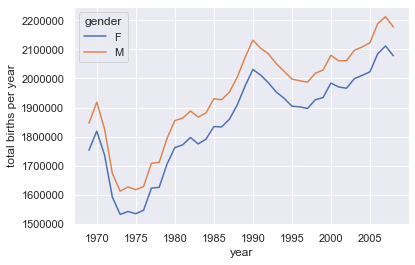

In [112]:
# we can visualize this using matplotlib in pandas

%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # using seaborn styles

births.pivot_table('births', index='year', columns='gender',
                  aggfunc='sum').plot()
plt.ylabel("total births per year")


A general conclusion might be that the male birth rate has been on increasing rate more than the female for the past 50 years. We should not overlook the fact that a decline was recorded in the year 1975, 1995 and at about 2008

In [147]:
births.query("year == [1975,1995, 2007] & gender == ['F', 'M'] ")

,year,month,day,gender,births,decade
4593,1975,1,1.0,F,3469,1970
4594,1975,1,1.0,M,3559,1970
4595,1975,1,2.0,F,3928,1970
4596,1975,1,2.0,M,3945,1970
4597,1975,1,3.0,F,4107,1970
...,...,...,...,...,...,...
15518,2007,10,NaN,M,189157,2000
15519,2007,11,NaN,F,173513,2000
15520,2007,11,NaN,M,180814,2000
15521,2007,12,NaN,F,173787,2000


In [149]:
births.isnull().any()

year      False
month     False
day        True
gender    False
births    False
decade    False
dtype: bool

In [153]:
births['day'].value_counts()

27.0    480
25.0    480
2.0     480
3.0     480
4.0     480
5.0     480
6.0     480
7.0     480
8.0     480
10.0    480
12.0    480
14.0    480
16.0    480
20.0    480
24.0    480
28.0    480
17.0    480
23.0    480
9.0     480
21.0    480
11.0    480
13.0    480
15.0    480
18.0    480
22.0    480
26.0    480
19.0    480
1.0     480
29.0    464
30.0    450
31.0    363
99.0    350
Name: day, dtype: int64

We could see that we have outliers in our day column, there is no way june should have 31st or 99th. we have to clean the data by removing outliers.

The easiest way to remove this kind of outlier is through the robust sigma-clipping operation.


In [155]:
quartiles = np.percentile(births['births'], [25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0]) # this is the robust estimate of the sample mean

# 0.74 comes from the interquartile range of a gaussian distribution.
# with this, we can use query method



In [182]:
# removing outliers from the births column
births = births.query("(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)")
births

,year,month,day,gender,births,decade,dayofweek,dayof_week,day_of_week
1969-01-01,1969,1,1,F,4046,1960,2,2,2
1969-01-01,1969,1,1,M,4440,1960,2,2,2
1969-01-02,1969,1,2,F,4454,1960,3,3,3
1969-01-02,1969,1,2,M,4548,1960,3,3,3
1969-01-03,1969,1,3,F,4548,1960,4,4,4
...,...,...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3,3,3
1988-12-30,1988,12,30,F,5742,1980,4,4,4
1988-12-30,1988,12,30,M,6095,1980,4,4,4
1988-12-31,1988,12,31,F,4435,1980,5,5,5


In [183]:
# removing outliers from the day column

# set 'day' column to integer 
births['day'] = births['day'].astype(int)
print(births['day'].dtype)

int32


In [184]:
# finally we combine the day month and year to Date index

# create a date index

births.index = pd.to_datetime(10000 * births.year + 
                             100 * births.month +
                             births.day, format='%Y%m%d')

births['day_of_week'] = births.index.dayofweek


In [185]:
births.head()

,year,month,day,gender,births,decade,dayofweek,dayof_week,day_of_week
1969-01-01,1969,1,1,F,4046,1960,2,2,2
1969-01-01,1969,1,1,M,4440,1960,2,2,2
1969-01-02,1969,1,2,F,4454,1960,3,3,3
1969-01-02,1969,1,2,M,4548,1960,3,3,3
1969-01-03,1969,1,3,F,4548,1960,4,4,4


Text(0, 0.5, 'mean births by day')

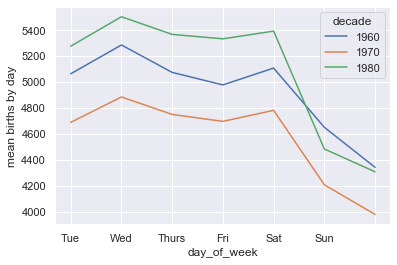

In [186]:
# plotting birth per week days for several decades

import matplotlib as mpl
births.pivot_table('births', index='day_of_week', columns='decade',
                  aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed','Thurs','Fri','Sat','Sun'])
plt.ylabel('mean births by day')

We could see that births are less common on weekdays than on weekends


In [215]:
# grouping the birth rate by month and day

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [216]:
births_by_date.tail()

births
12 27  4850.15
   28  5044.20
   29  5120.15
   30  5172.35
   31  4859.20

In [220]:
import datetime
births_by_date.index = pd.datetime(2012, month, day)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


NameError: name 'month' is not defined